# **Using One-Hot Method to extract features**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# read emoticon dataset
train_emoticon_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

valid_emoticon_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()

test_emoticon_X = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/test/test_emoticon.csv")['input_emoticon'].tolist()

print(f"Train dataset size: ")
print(f"train_emoticon_X: {len(train_emoticon_X)} train_emoticon_Y: {len(train_emoticon_Y)}")

print()
print("Valid dataset size: ")
print(f"valid_emoticon_X: {len(valid_emoticon_X)} valid_emoticon_Y: {len(valid_emoticon_Y)}")

print()
print("Test dataset size: ")
print(f"test_emoticon_X: {len(test_emoticon_X)}")


Train dataset size: 
train_emoticon_X: 7080 train_emoticon_Y: 7080

Valid dataset size: 
valid_emoticon_X: 489 valid_emoticon_Y: 489

Test dataset size: 
test_emoticon_X: 2232


In [2]:
# Convert list to NumPy array
train_emoticon_X = np.array(train_emoticon_X)
valid_emoticon_X = np.array(valid_emoticon_X)
test_emoticon_X = np.array(test_emoticon_X)

train_emoticon_Y = np.array(train_emoticon_Y)
valid_emoticon_Y = np.array(valid_emoticon_Y)

print(type(train_emoticon_X))
print(type(train_emoticon_X[0]))

# Concatenate all lists into one
all_texts = ''.join(train_emoticon_X.flatten()) + ''.join(valid_emoticon_X.flatten()) + ''.join(test_emoticon_X.flatten())

# Get unique characters
unique_characters = np.unique(list(all_texts))
print(unique_characters)
# Create a mapping from characters to indices
char_to_index = {char: idx for idx, char in enumerate(unique_characters)}
print(unique_characters.shape)
print(len(char_to_index))

<class 'numpy.ndarray'>
<class 'numpy.str_'>
['😀' '😁' '😂' '😃' '😄' '😅' '😆' '😇' '😈' '😉' '😊' '😋' '😌' '😍' '😎' '😏' '😐' '😑'
 '😒' '😓' '😔' '😕' '😖' '😗' '😘' '😙' '😚' '😛' '😜' '😝' '😞' '😟' '😠' '😡' '😢' '😣'
 '😤' '😥' '😦' '😧' '😨' '😩' '😪' '😫' '😬' '😭' '😮' '😯' '😰' '😱' '😲' '😳' '😴' '😵'
 '😶' '😷' '😸' '😹' '😺' '😻' '😼' '😽' '😾' '😿' '🙀' '🙁' '🙂' '🙃' '🙄' '🙅' '🙆' '🙇'
 '🙈' '🙉' '🙊' '🙋' '🙌' '🙍' '🙎' '🙏' '🙐' '🙑' '🙒' '🙓' '🙔' '🙕' '🙖' '🙗' '🙘' '🙙'
 '🙚' '🙛' '🙜' '🙝' '🙞' '🙟' '🙠' '🙡' '🙢' '🙣' '🙤' '🙥' '🙦' '🙧' '🙨' '🙩' '🙪' '🙫'
 '🙬' '🙭' '🙮' '🙯' '🙰' '🙱' '🙲' '🙳' '🙴' '🙵' '🙶' '🙷' '🙸' '🙹' '🙺' '🙻' '🙼' '🙽'
 '🙾' '🙿' '🚀' '🚁' '🚂' '🚃' '🚄' '🚅' '🚆' '🚇' '🚈' '🚉' '🚊' '🚋' '🚌' '🚍' '🚎' '🚏'
 '🚐' '🚑' '🚒' '🚓' '🚔' '🚕' '🚖' '🚗' '🚘' '🚙' '🚚' '🚛' '🚜' '🚝' '🚞' '🚟' '🚠' '🚡'
 '🚢' '🚣' '🚤' '🚥' '🚦' '🚧' '🚨' '🚩' '🚪' '🚫' '🚬' '🚭' '🚮' '🚯' '🚰' '🚱' '🚲' '🚳'
 '🚴' '🚵' '🚶' '🚷' '🚸' '🚹' '🚺' '🚻' '🚼' '🚽' '🚾' '🚿' '🛀' '🛁' '🛂' '🛃' '🛄' '🛅'
 '🛆' '🛇' '🛈' '🛉' '🛊' '🛋' '🛌' '🛍' '🛎' '🛏' '🛐' '🛑' '🛒' '🛓' '🛔' '🛕' '🛖' '🛗'
 '\U0001f6d8' '\U0001f6d9' '\U0001f6da' '\U0001f6db' '\U0001f6dc'
 '\U0001f6dd'

In [3]:
# Function to convert input emoticons to a 13x226 matrix
def one_hot_count_matrix(emoticon, max_len=13, num_classes=226):
    # Initialize a matrix of zeros
    matrix = np.zeros((max_len, num_classes))
    # Iterate through the characters in the emoticon
    for i, char in enumerate(emoticon):
        if char in char_to_index:  # Check if char exists in the mapping
            matrix[i, char_to_index[char]] = 1  # One-hot encoding
        else:
            print(f"Character '{char}' not found in char_to_index.")  # Optional: log missing characters
    return matrix.flatten()  # Flatten to a vector for SVM input

# Create the training and validation datasets
X_train = np.array([one_hot_count_matrix(emoticon) for emoticon in train_emoticon_X])
X_valid = np.array([one_hot_count_matrix(emoticon) for emoticon in valid_emoticon_X])
X_test = np.array([one_hot_count_matrix(emoticon) for emoticon in test_emoticon_X])

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the datasets
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)  # Only transform, no fitting on validation or test sets
X_test = scaler.transform(X_test)

# ***Logistic Regression***

In [4]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, train_emoticon_Y)

# Predict classes for validation data
valid_predictions = logreg_classifier.predict(X_valid)
train_predictions = logreg_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_emoticon_Y, valid_predictions)
print(f"Validation Accuracy with Logistic Regression: {valid_accuracy}")

# Calculate training accuracy
train_accuracy = accuracy_score(train_emoticon_Y, train_predictions)
print(f"Train Accuracy with Logistic Regression: {train_accuracy}")

f1 = f1_score(valid_emoticon_Y, valid_predictions, average='weighted')
print(f"F1 Score with Logistic Regression: {f1}")

# Calculate the number of trainable parameters
n_weights = logreg_classifier.coef_.size  # Number of weights (features)
n_intercepts = logreg_classifier.intercept_.size  # Number of intercepts (bias term)

n_trainable_parameters = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_trainable_parameters}")

Validation Accuracy with Logistic Regression: 0.8936605316973415
Train Accuracy with Logistic Regression: 1.0
F1 Score with Logistic Regression: 0.8936801088379496
Number of trainable parameters: 2939


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20                1.0             0.738241
1          40                1.0             0.791411
2          60                1.0             0.842536
3          80                1.0             0.889571
4         100                1.0             0.893661


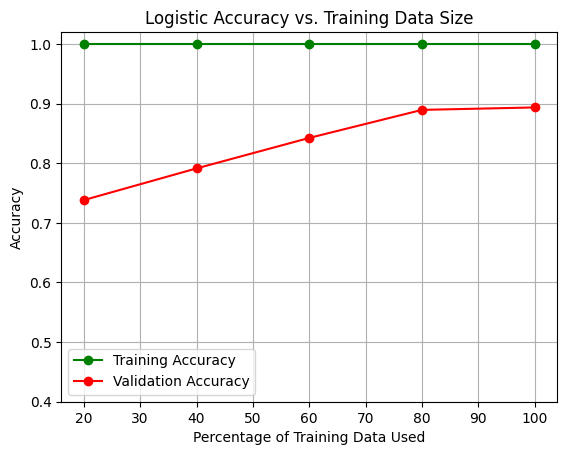

In [5]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Logistic classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_emoticon_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_emoticon_Y, train_size=percentage, random_state=42)

    # Train Logistic Regression classifier
    logreg_classifier = LogisticRegression(max_iter=1000)
    logreg_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = logreg_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = logreg_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_emoticon_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)
# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('Logistic Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# ***KNN***

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (n_neighbors)
knn_classifier.fit(X_train, train_emoticon_Y)

# Predict classes for validation data
valid_predictions = knn_classifier.predict(X_valid)
train_predictions = knn_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_emoticon_Y, valid_predictions)
print(f"Validation Accuracy with KNN: {valid_accuracy}")

# Calculate training accuracy
train_accuracy = accuracy_score(train_emoticon_Y, train_predictions)
print(f"Train Accuracy with KNN: {train_accuracy:}")

f1 = f1_score(valid_emoticon_Y, valid_predictions, average='weighted')
print(f"F1 Score with KNN Regression: {f1}")

Validation Accuracy with KNN: 0.5930470347648262
Train Accuracy with KNN: 0.7221751412429378
F1 Score with KNN Regression: 0.5931219220757161


# ***LwP***

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score

def compute_class_prototypes(X_train, Y_train):
    """Compute the mean prototype for each class."""
    class_0_prototype = X_train[Y_train == 0].mean(axis=0)
    class_1_prototype = X_train[Y_train == 1].mean(axis=0)
    return class_0_prototype, class_1_prototype

def predict_lwp(X_valid, class_0_prototype, class_1_prototype):
    """Predict labels based on distance to prototypes."""
    predictions = []
    for x in X_valid:
        # Compute distances to each prototype
        distance_to_class_0 = np.linalg.norm(x - class_0_prototype)
        distance_to_class_1 = np.linalg.norm(x - class_1_prototype)

        # Assign the class with the closer prototype
        if distance_to_class_0 < distance_to_class_1:
            predictions.append(0)
        else:
            predictions.append(1)

    return np.array(predictions)

# Compute prototypes for the two classes
class_0_prototype, class_1_prototype = compute_class_prototypes(X_train, train_emoticon_Y)

# Predict on the training data
train_predictions = predict_lwp(X_train, class_0_prototype, class_1_prototype)
train_accuracy = accuracy_score(train_emoticon_Y, train_predictions)
print(f"Train Accuracy with LWP: {train_accuracy}")

# Predict on the validation data
valid_predictions = predict_lwp(X_valid, class_0_prototype, class_1_prototype)
valid_accuracy = accuracy_score(valid_emoticon_Y, valid_predictions)
print(f"Validation Accuracy with LWP: {valid_accuracy}")

f1 = f1_score(valid_emoticon_Y, valid_predictions, average='weighted')
print(f"f1 score with LwP Regression: {f1}")

Train Accuracy with LWP: 0.9269774011299435
Validation Accuracy with LWP: 0.8241308793456033
f1 score with LwP Regression: 0.824172074762702


# ***SVM Classifier***

In [8]:
# Train SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also experiment with other kernels
svm_classifier.fit(X_train, train_emoticon_Y)

# Predict classes for validation data
valid_predictions = svm_classifier.predict(X_valid)
train_predictions = svm_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_emoticon_Y, valid_predictions)
print(f"Validation Accuracy with SVM: {valid_accuracy}")

# Calculate validation accuracy
train_accuracy = accuracy_score(train_emoticon_Y, train_predictions)
print(f"Train Accuracy with SVM: {train_accuracy}")

f1 = f1_score(valid_emoticon_Y, valid_predictions, average='weighted')
print(f"F1 Score with SVM: {f1}")

n_weights = svm_classifier.coef_.size  # Number of weights
n_intercepts = svm_classifier.intercept_.size  # Number of intercepts
n_params = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_params}")

Validation Accuracy with SVM: 0.8834355828220859
Train Accuracy with SVM: 1.0
F1 Score with SVM: 0.8834619101890375
Number of trainable parameters: 2939


0.2
0.4
0.6
0.8
1.0
   Percentage  Training Accuracy  Validation Accuracy
0          20                1.0             0.736196
1          40                1.0             0.785276
2          60                1.0             0.820041
3          80                1.0             0.865031
4         100                1.0             0.883436


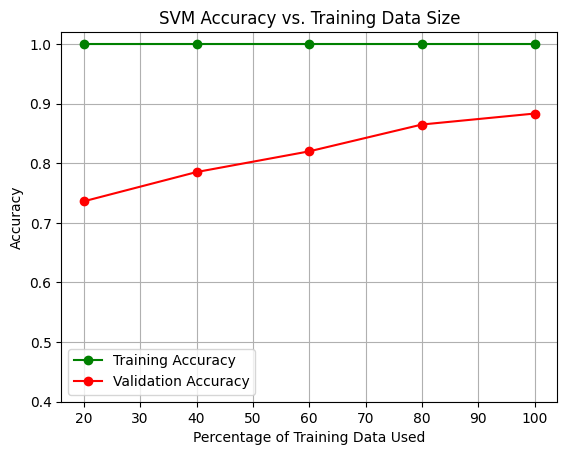

In [9]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]  # Adjust 100% to a very close float value
train_accuracies = []
valid_accuracies = []

# Train SVM classifier with different portions of the training data
for percentage in train_percentages:
    # Split the training data
    print(percentage)
    if(percentage == 1.0):
        X_train_subset = X_train
        Y_train_subset = train_emoticon_Y
    else:
      X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_emoticon_Y, train_size=percentage, random_state=42)

    # Train SVM classifier
    svm_classifier = SVC(kernel='linear')  # You can experiment with other kernels if needed
    svm_classifier.fit(X_train_subset, Y_train_subset)

    # Predictions and accuracy on training data
    train_predictions = svm_classifier.predict(X_train_subset)
    train_accuracy = accuracy_score(Y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)

    # Predictions and accuracy on validation data
    valid_predictions = svm_classifier.predict(X_valid)
    valid_accuracy = accuracy_score(valid_emoticon_Y, valid_predictions)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies with different colors for train and validation accuracy
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Data Size')

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


# **Embeddings-Based Feature Extraction**

In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

# Read emoticon dataset
train_emoticon_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

valid_emoticon_df = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()

test_emoticon_X = pd.read_csv("https://raw.githubusercontent.com/psarath22/CS771_M1/main/datasets/test/test_emoticon.csv")['input_emoticon'].tolist()

# Convert lists to NumPy arrays
train_emoticon_X = np.array(train_emoticon_X)
valid_emoticon_X = np.array(valid_emoticon_X)
test_emoticon_X = np.array(test_emoticon_X)

# Ensure labels are NumPy arrays
train_emoticon_Y = np.array(train_emoticon_Y)
valid_emoticon_Y = np.array(valid_emoticon_Y)

# Concatenate all texts to get unique characters
all_texts = ''.join(train_emoticon_X.flatten()) + ''.join(valid_emoticon_X.flatten()) + ''.join(test_emoticon_X.flatten())
unique_characters = np.unique(list(all_texts))

# Create character-to-index mapping
char_to_index = {char: idx + 1 for idx, char in enumerate(unique_characters)}  # Index starts from 1 for embedding
num_classes = len(unique_characters) + 1  # Include 0 for padding

# Convert sequences to integer sequences
def convert_to_sequences(sequences):
    return [[char_to_index[char] for char in seq] for seq in sequences]

# Convert to integer sequences
X_train = convert_to_sequences(train_emoticon_X)
X_valid = convert_to_sequences(valid_emoticon_X)
X_test = convert_to_sequences(test_emoticon_X)

# Pad sequences to a fixed length
max_len = 13  # Fixed sequence length
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_valid = pad_sequences(X_valid, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

# ***Logistic Regression***

In [11]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, train_emoticon_Y)

# Predict classes for validation data
valid_predictions = logreg_classifier.predict(X_valid)
train_predictions = logreg_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_emoticon_Y, valid_predictions)
print(f"Validation Accuracy with Logistic Regression: {valid_accuracy}")

# Calculate training accuracy
train_accuracy = accuracy_score(train_emoticon_Y, train_predictions)
print(f"Train Accuracy with Logistic Regression: {train_accuracy}")

f1 = f1_score(valid_emoticon_Y, valid_predictions, average='weighted')
print(f"F1 Score with Logistic Regression: {f1}")

# Calculate the number of trainable parameters
n_weights = logreg_classifier.coef_.size  # Number of weights (features)
n_intercepts = logreg_classifier.intercept_.size  # Number of intercepts (bias term)

n_trainable_parameters = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_trainable_parameters}")

Validation Accuracy with Logistic Regression: 0.5828220858895705
Train Accuracy with Logistic Regression: 0.561864406779661
F1 Score with Logistic Regression: 0.5826018562214881
Number of trainable parameters: 14


# ***KNN***

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (n_neighbors)
knn_classifier.fit(X_train, train_emoticon_Y)

# Predict classes for validation data
valid_predictions = knn_classifier.predict(X_valid)
train_predictions = knn_classifier.predict(X_train)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_emoticon_Y, valid_predictions)
print(f"Validation Accuracy with KNN: {valid_accuracy}")

# Calculate training accuracy
train_accuracy = accuracy_score(train_emoticon_Y, train_predictions)
print(f"Train Accuracy with KNN: {train_accuracy:}")

f1 = f1_score(valid_emoticon_Y, valid_predictions, average='weighted')
print(f"F1 Score with KNN Regression: {f1}")

Validation Accuracy with KNN: 0.5276073619631901
Train Accuracy with KNN: 0.6937853107344633
F1 Score with KNN Regression: 0.5268046355384003


# ***LwP***

In [13]:
import numpy as np
from sklearn.metrics import accuracy_score

def compute_class_prototypes(X_train, Y_train):
    """Compute the mean prototype for each class."""
    class_0_prototype = X_train[Y_train == 0].mean(axis=0)
    class_1_prototype = X_train[Y_train == 1].mean(axis=0)
    return class_0_prototype, class_1_prototype

def predict_lwp(X_valid, class_0_prototype, class_1_prototype):
    """Predict labels based on distance to prototypes."""
    predictions = []
    for x in X_valid:
        # Compute distances to each prototype
        distance_to_class_0 = np.linalg.norm(x - class_0_prototype)
        distance_to_class_1 = np.linalg.norm(x - class_1_prototype)

        # Assign the class with the closer prototype
        if distance_to_class_0 < distance_to_class_1:
            predictions.append(0)
        else:
            predictions.append(1)

    return np.array(predictions)

# Compute prototypes for the two classes
class_0_prototype, class_1_prototype = compute_class_prototypes(X_train, train_emoticon_Y)

# Predict on the training data
train_predictions = predict_lwp(X_train, class_0_prototype, class_1_prototype)
train_accuracy = accuracy_score(train_emoticon_Y, train_predictions)
print(f"Train Accuracy with LWP: {train_accuracy}")

# Predict on the validation data
valid_predictions = predict_lwp(X_valid, class_0_prototype, class_1_prototype)
valid_accuracy = accuracy_score(valid_emoticon_Y, valid_predictions)
print(f"Validation Accuracy with LWP: {valid_accuracy}")

f1 = f1_score(valid_emoticon_Y, valid_predictions, average='weighted')
print(f"f1 score with LwP Regression: {f1}")

Train Accuracy with LWP: 0.5454802259887006
Validation Accuracy with LWP: 0.556237218813906
f1 score with LwP Regression: 0.5553157512926353


# ***SVM Classifier***

In [14]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the datasets
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)  # Only transform, no fitting on validation or test sets
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also experiment with other kernels
svm_classifier.fit(X_train_scaled, train_emoticon_Y)

# Predict classes for validation data
valid_predictions = svm_classifier.predict(X_valid_scaled)
train_predictions = svm_classifier.predict(X_train_scaled)

# Calculate validation accuracy
valid_accuracy = accuracy_score(valid_emoticon_Y, valid_predictions)
print(f"Validation Accuracy with SVM: {valid_accuracy}")

# Calculate validation accuracy
train_accuracy = accuracy_score(train_emoticon_Y, train_predictions)
print(f"Train Accuracy with SVM: {train_accuracy}")

f1 = f1_score(valid_emoticon_Y, valid_predictions, average='weighted')
print(f"F1 Score with SVM: {f1}")

n_weights = svm_classifier.coef_.size  # Number of weights
n_intercepts = svm_classifier.intercept_.size  # Number of intercepts
n_params = n_weights + n_intercepts
print(f"Number of trainable parameters: {n_params}")

Validation Accuracy with SVM: 0.5848670756646217
Train Accuracy with SVM: 0.5603107344632768
F1 Score with SVM: 0.5849122144712842
Number of trainable parameters: 14


# ***Deep Neural Network***

In [15]:
# Define the model for feature extraction
embedding_dimension = 12 # Dimension of the embedding
# Define and compile the model
model = Sequential()
model.add(Embedding(input_dim=num_classes, output_dim=embedding_dimension, input_length=max_len))  # Added input_length
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, train_emoticon_Y, epochs=10, batch_size=32, validation_data=(X_valid, valid_emoticon_Y))

# Evaluate the model on training and validation data
train_loss, train_accuracy = model.evaluate(X_train, train_emoticon_Y, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid, valid_emoticon_Y, verbose=0)

# Predictions and calculate F1 score and confusion matrix
valid_predictions = (model.predict(X_valid) > 0.5).astype("int32")
f1 = f1_score(valid_emoticon_Y, valid_predictions)

# Print accuracies and F1 score
model.summary()

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/10
222/222 [==============================] - 1s 3ms/step - loss: 0.6746 - accuracy: 0.6277 - val_loss: 0.5473 - val_accuracy: 0.8937
Epoch 2/10
222/222 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.9400 - val_loss: 0.1330 - val_accuracy: 0.9734
Epoch 3/10
222/222 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9701 - val_loss: 0.0878 - val_accuracy: 0.9796
Epoch 4/10
222/222 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9811 - val_loss: 0.0705 - val_accuracy: 0.9857
Epoch 5/10
222/222 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9838 - val_loss: 0.0685 - val_accuracy: 0.9734
Epoch 6/10
222/222 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9846 - val_loss: 0.0573 - val_accuracy: 0.9796
Epoch 7/10
222/222 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9890 - val_loss: 0.0495 - val_accuracy: 0.9857
Epoch 

Training on 20.0% of the data
Training on 40.0% of the data
Training on 60.0% of the data
Training on 80.0% of the data
Training on 100.0% of the data
   Percentage  Training Accuracy  Validation Accuracy
0          20           0.993644             0.903885
1          40           0.999294             0.944785
2          60           0.999058             0.961145
3          80           0.997175             0.981595
4         100           0.998729             0.985685


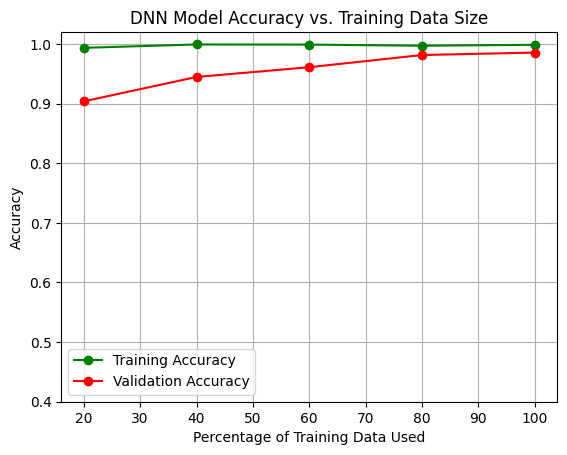

In [16]:
# Split the training data into different sizes (20%, 40%, 60%, 80%, 100%)
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
train_accuracies = []
valid_accuracies = []

# Analyze model performance with different training set sizes
for percentage in train_percentages:
    print(f"Training on {percentage * 100}% of the data")
    if percentage == 1.0:
        X_train_subset = X_train
        Y_train_subset = train_emoticon_Y
    else:
        X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, train_emoticon_Y, train_size=percentage, random_state=42)

    # Define and compile the model
    model = Sequential()
    model.add(Embedding(input_dim=num_classes, output_dim=embedding_dimension, input_length=max_len))  # Added input_length
    model.add(Flatten())
    model.add(Dense(24, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_subset, Y_train_subset, epochs=10, batch_size=32, validation_data=(X_valid, valid_emoticon_Y), verbose=0)

    # Evaluate the model on training and validation data
    train_loss, train_accuracy = model.evaluate(X_train_subset, Y_train_subset, verbose=0)
    valid_loss, valid_accuracy = model.evaluate(X_valid, valid_emoticon_Y, verbose=0)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

# Create a DataFrame to print the table
data = {
    "Percentage": [int(p * 100) for p in train_percentages],
    "Training Accuracy": train_accuracies,
    "Validation Accuracy": valid_accuracies
}

accuracy_df = pd.DataFrame(data)
print(accuracy_df)

# Plot the accuracies
plt.plot([int(p * 100) for p in train_percentages], train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot([int(p * 100) for p in train_percentages], valid_accuracies, label='Validation Accuracy', color='red', marker='o')

# Add labels and title
plt.ylim(0.4, 1.02)
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy')
plt.title('DNN Model Accuracy vs. Training Data Size')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Make predictions on the test set
test_predictions = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Print test predictions
print("Test Predictions:", test_predictions)

70/70 [==============================] - 0s 1ms/step
Test Predictions: [1 1 0 ... 1 1 0]
